#**LIVER DISEASE DETECTION SYSTEM**

#Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Loading Dataset

In [2]:
df = pd.read_csv("/content/indian_liver_patient.csv")

In [3]:
df.shape

(583, 11)

In [4]:
#DATASET INFORMATION

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Only Albumin_and_Globulin_Ratio has 4 missing values 

In [5]:
df[df['Albumin_and_Globulin_Ratio'].isnull()] 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [6]:
df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


#Data Description

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.000000,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.000000,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.300000,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.000000,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.000000,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.000000,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.600000,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.100000,3.8,5.5
Albumin_and_Globulin_Ratio,583.0,0.947064,0.318492,0.3,0.7,0.947064,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.000000,2.0,2.0


In [10]:
# CHECKING NULL VALUES

df.isna().sum() 

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

#Data Visualization

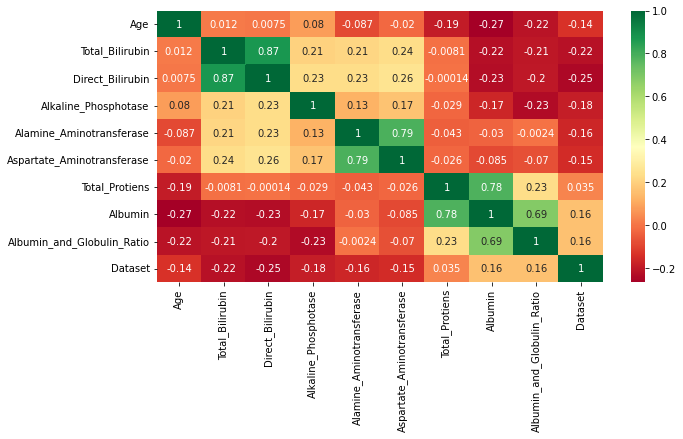

In [11]:
#PLOTTING HEATMAP

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [13]:
#CHECKING DATA SET ID BALANCED OR NOT

true_count = len(df.loc[df['Dataset'] == 1])
false_count = len(df.loc[df['Dataset'] == 2])


In [14]:
true_count, false_count

(416, 167)

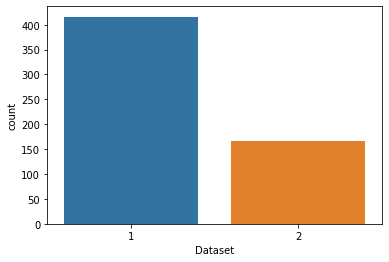

In [15]:
# plotting graph for output classes counts

sns.countplot(x = 'Dataset',data = df)

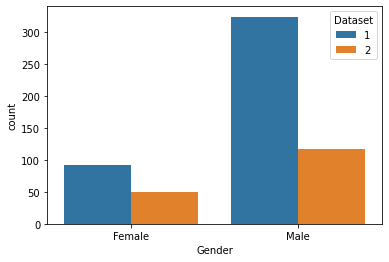

In [16]:
df.head()
sns.countplot('Gender', data = df, hue = 'Dataset')

Only gender is object valued so we convert it to numeric

In [17]:
#Encoding

df = pd.get_dummies(df, columns = ['Gender']) 

In [18]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [19]:
df.shape

(583, 12)

In [20]:
df.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

# Data splitting

In [21]:
from sklearn.model_selection import train_test_split
feature_columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                   'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
                   'Gender_Female', 'Gender_Male']
predicted_class = ['Dataset']

In [22]:
X = df[feature_columns]
y = df[predicted_class]

Oversampling to have balanced data

In [23]:
#SCALING FOR BETTER RESULTS

from imblearn.over_sampling import SMOTE 
smk = SMOTE(random_state = 42)
X, y = smk.fit_resample(X,y)
X.shape, y.shape

((832, 11), (832, 1))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((665, 11), (167, 11), (665, 1), (167, 1))

#Machine learning techniques

##Random Forest

In [26]:

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

model = random_forest_model.fit(X_train, y_train)

In [27]:
predict_train_data = model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

accrf=metrics.accuracy_score(y_test, predict_train_data)

Accuracy = 0.814


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_train_data)
cm

array([[71, 17],
       [14, 65]])

##Extreme Gradient Boost

In [29]:
from xgboost import XGBClassifier
from sklearn import metrics
   
xg_model = XGBClassifier(random_state=42)
model_1 = xg_model.fit(X_train, y_train)

predict_train_data = model_1.predict(X_test)
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

accxgb=metrics.accuracy_score(y_test, predict_train_data)

Accuracy = 0.778


##Extra Trees Classifier

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

model_2 = ExtraTreesClassifier(random_state=123)
model_2.fit(X_train, y_train)
predict_train_data = model_2.predict(X_test)
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.838


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_train_data ))

accxt=metrics.accuracy_score(y_test, predict_train_data)

              precision    recall  f1-score   support

           1       0.86      0.83      0.84        88
           2       0.82      0.85      0.83        79

    accuracy                           0.84       167
   macro avg       0.84      0.84      0.84       167
weighted avg       0.84      0.84      0.84       167



##Confusion Matrix of Extra Tree Classifier##

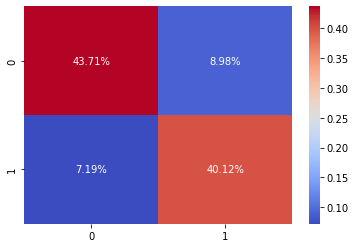

In [32]:
cmxt=confusion_matrix(y_test,predict_train_data)
sns.heatmap(cmxt/np.sum(cmxt),annot=True,fmt='0.2%',cmap='coolwarm')

#Results

In [33]:
mdl = pd.DataFrame({"Models":["random forest","XGBoost","XTclassifier"],
                    "Accuracy":[accrf,accxgb,accxt]})
mdl

,Models,Accuracy
0,random forest,0.814371
1,XGBoost,0.778443
2,XTclassifier,0.838323


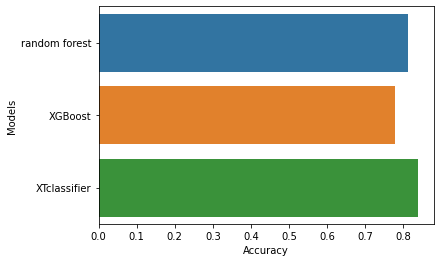

In [34]:
sns.barplot(x='Accuracy', y='Models',data=mdl)
plt.show()